# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [8]:
%pip install pandas
%pip install SQLAlchemy==1.4.46
%pip install pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
                                              0.0/470.9 kB ? eta -:--:--
     -----------------------                286.7/470.9 kB 8.9 MB/s eta 0:00:01
     -------------------------------------- 470.9/470.9 kB 7.4 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
                                              0.0/1.9 MB ? eta -:--:--
     ---------                                0.5/1.9 MB 9.8 MB/s eta 0:00:01
     ----------------------------------       1.7/1.9 MB 17.6 MB/s eta 0:00:01
     ---------------------------------------- 1.9/1.9 MB 15.5 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
  Using cached Pillow-9.5.0-cp311-cp311-win_amd64.whl (2.5 MB)
                                              0.0/102.6 kB ? eta -:--:--
    

## Load data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('data/database.db')


df1 = pd.read_sql_query("SELECT * FROM Gefahrenkontrollen", conn)
df2 = pd.read_sql_query("SELECT * FROM Gefahrgutzwischenfaelle", conn)

### Look at the first rows

In [13]:
df1.head(10)
df2.head(10)

,Year,Incidents/Accidents,Accidents with injuries to persons,administrative offense proceedings,Applications for exemptions,Permissions for overflight,Approvals for the transport of Dangerous Goods for German air carriers
0,2000,785,10,42,22,28,28
1,2001,719,7,36,12,23,59
2,2002,814,4,33,24,27,28
3,2003,1360,6,33,20,20,27
4,2004,1385,4,28,35,18,10
5,2005,1149,4,8,44,19,8
6,2006,5231,2,10,28,32,5
7,2007,11641,7,4,53,54,13
8,2008,20851,3,11,87,29,3
9,2009,37510,5,10,88,55,11


### Data exploration
Print some basic information about the data. Your data exploration would continue here.

In [15]:
df1.info()
df2.info()

# Get the number of accidents per year
accidents_per_year = df2.groupby('Year')['Incidents/Accidents'].sum()

# Get the number of controls per year
controls_per_year = df1.groupby('Year').sum()

# Combine the two series into a DataFrame
analysis_df = pd.DataFrame({'Accidents': accidents_per_year, 'Controls': controls_per_year})

# Plotting the number of accidents and controls over the years
analysis_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Accidents and Controls Over the Years')
plt.legend()
plt.show()

# Display the combined DataFrame
print(analysis_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Year                                 23 non-null     int64
 1   German air carriers                  23 non-null     int64
 2   Foreign air carriers                 23 non-null     int64
 3   Handling Agents                      23 non-null     int64
 4   German Airports and Aerodromes       23 non-null     int64
 5   Express Courier with own aeroplanes  23 non-null     int64
dtypes: int64(6)
memory usage: 1.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column                                                                  Non-Null Count  Dtype
---  ------                                                                  --------------  -----
 0   Year                                       

ValueError: Data must be 1-dimensional, got ndarray of shape (23, 5) instead

   Year  German air carriers  Foreign air carriers  Handling Agents  \
0  2000                    2                    16               42   
1  2001                   15                     8               28   
2  2002                   22                    16               39   
3  2003                   46                    24               23   
4  2004                   56                    35               39   

   German Airports and Aerodromes  Express Courier with own aeroplanes  
0                              14                                    2  
1                              10                                    1  
2                              16                                    0  
3                              13                                    1  
4                              20                                    1  
             Year  German air carriers  Foreign air carriers  Handling Agents  \
count    23.00000            23.000000             23.

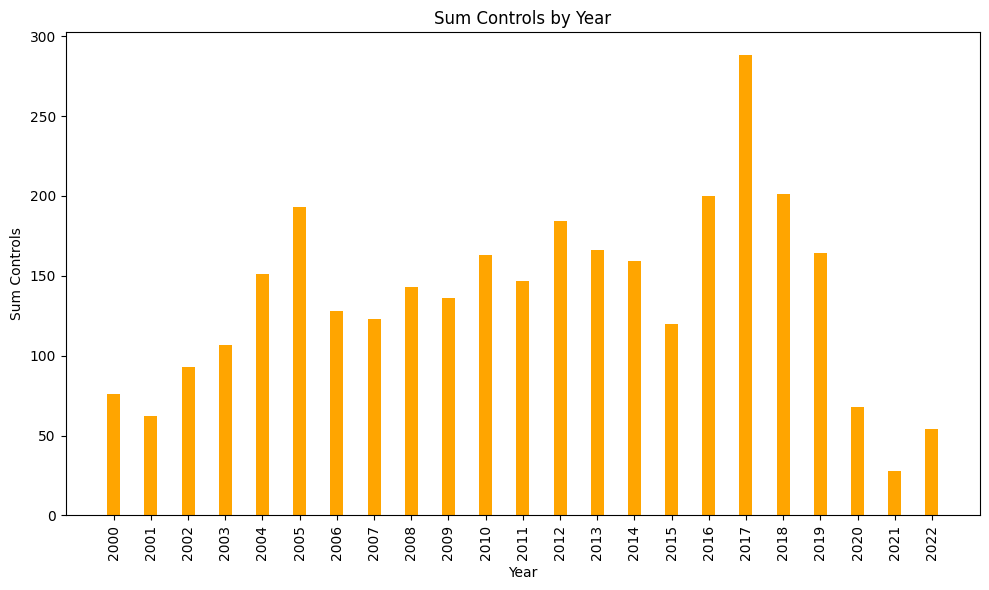

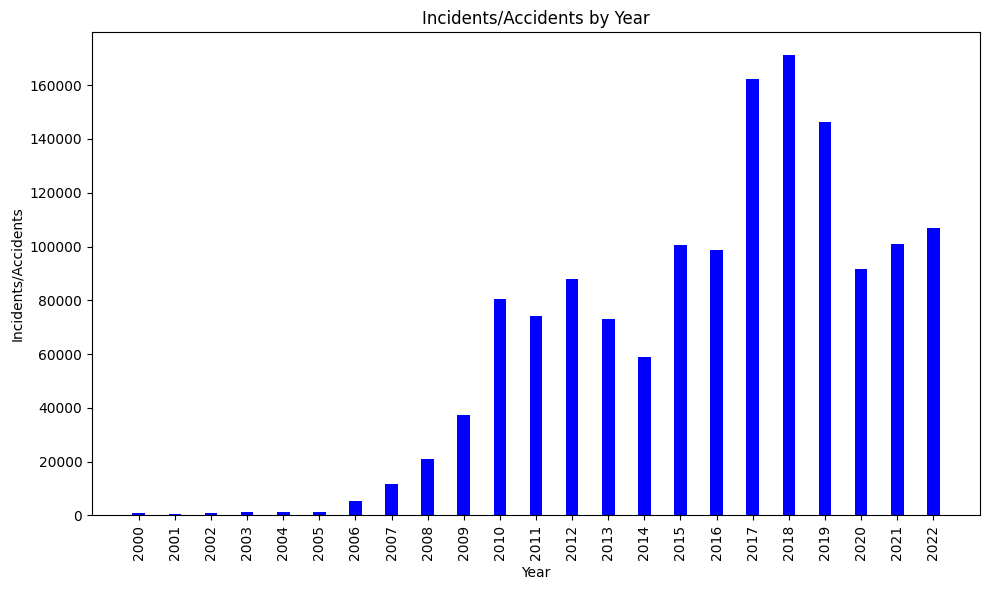

In [25]:
conn = sqlite3.connect('./data/database.db')

print(df1.head())  # Display the first few rows of df1
print(df1.describe())  # Get statistical summary of df1
print(df1.dtypes)  # Print the data types of columns in df1

print(df2.head())  # Display the first few rows of df2
print(df2.describe())  # Get statistical summary of df2
print(df2.dtypes)  # Print the data types of columns in df2
# Query the data and calculate the sum controls
query = '''
SELECT Year, 
       `German air carriers`, 
       `Foreign air carriers`, 
       `Handling Agents`, 
       `German Airports and Aerodromes`, 
       `Express Courier with own aeroplanes`,
       (`German air carriers` + `Foreign air carriers` + `Handling Agents` +
        `German Airports and Aerodromes` + `Express Courier with own aeroplanes`) AS "sum controls"
FROM Gefahrenkontrollen
'''
df_sum_controls = pd.read_sql_query(query, conn)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis and y-axis data
x = df_sum_controls['Year']
y = df_sum_controls['sum controls']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = [i for i in range(len(x))]

# Create the bars
bars = ax.bar(bar_positions, y, bar_width, color='orange')

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Sum Controls')
ax.set_title('Sum Controls by Year')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

# Query the data from the table
query1 = '''
SELECT Year, `Incidents/Accidents` AS Incidents
FROM Gefahrgutzwischenfaelle
'''
df_incidents = pd.read_sql_query(query1, conn)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis and y-axis data
x = df_incidents['Year']
y = df_incidents['Incidents']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = [i for i in range(len(x))]

# Create the bars
bars = ax.bar(bar_positions, y, bar_width, color='blue')

# Set the labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Incidents/Accidents')
ax.set_title('Incidents/Accidents by Year')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)

# Show the plot
plt.tight_layout()
plt.show()